<a href="https://colab.research.google.com/github/JeromeMberia/user_review_analysis/blob/main/user_review_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# PROBLEM STATEMENT 

## Specifying the question

Predict if each textual review is an exchange letters to a good review meaning the customer is happy alternatively a bad one meaning the customer is not satisfied.

## Defining the metric of success

## Understanding the context

## Recording the experimental design

## Data Relevance

# Natural Language Processing (NLP)

### Loading Libraries

In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import string

### Data Loading

In [2]:
#uploading and readin the dataset
data = pd.read_csv("/content/user_review_data.csv")
data.head()

FileNotFoundError: ignored

### Natural Language Processing

In [ ]:
#checking the top 5 rows
data.head()

In [ ]:
#checking the bottom 5 rows
data.tail()

In [ ]:
#Getting the dataset shape.
data.shape

In [ ]:
##Get the summary of this dataframe
data.info()

observation: our dataset comprise of object and integer datatype. both colunms has 15000 values, this is a clue of no missing values. 

In [ ]:
#checking the body_review variable values
data['review_body'].sample(n=10, random_state=610)

observation: the values comprises of words, symbols, panctuations and so on.

In [ ]:
#Using groupby will check the data
data.groupby('star_rating').describe()

In [ ]:
#previewing the dataset variables
data.columns

observation: the two colunms are, review_body, and star_rating.

## Pre processing the data

Here we will check for missing values, duplicates, outliers and remove any unnecessary variables/features/columns if any. other preprocessing procedures are tokenizing(spliting),stemming and lemmatization.

In [ ]:
#checking for the missing values
data_corpus = data.copy()
data_corpus.head(10)

observation: there is no missing values

In [ ]:
#Checking for duplicates
data_corpus.duplicated().sum()

observation: there are 439 duplicates.

In [ ]:
#dropping the duplicates
data_corpus.drop_duplicates(inplace=True)
#
#confirming no duplicates
data_corpus.duplicated().any()

observation: duplicates have been dropped.

## finding rare words and splitting them

In [ ]:
# Finding Rare Words i.e. 100 of them
# --
data_corpus2= data_corpus.copy()
#
rare_words= pd.Series(' '.join(data_corpus2.review_body).split()).value_counts()[-100:]
rare_words

armagua         1
haalso          1
beautifulthe    1
elligible       1
linkstyle       1
               ..
weekits         1
bacteria        1
shotprice       1
sß              1
enoughif        1
Length: 100, dtype: int64

In [ ]:
# Splitting concatenated words
# ---
# We can split concatenated words into separate words i.e. 'thathad' to 'that', 'had' 
# but we first need to install wordninja & textblob libraries which will allows us to do this operation.
# --- 
# 
!pip3 install wordninja
!pip3 install textblob

In [ ]:
# Importing the required libraries
# ---
#  
import wordninja 
from textblob import TextBlob

# Performing our splitting 
# 
data_corpus2['review_body'] = data_corpus2.review_body.apply(lambda x: wordninja.split(str(TextBlob(x))))  
#
print(data_corpus2['review_body'].head(1))
#
data_corpus2['review_body'] = data_corpus2.review_body.str.join('')
print(data_corpus2[['review_body']].head())

0    [good, luck, finding, a, reasonably, priced, b...
Name: review_body, dtype: object
                                         review_body
0  goodluckfindingareasonablypricedbandreplacemen...
1  noigetdarkonthefirstweekwithmeiwillneverbuythi...
2  idontknowifminewasamistakebutitclearlystatesaq...
3  therodthatholdsthebraceletbrokeseveraltimesand...
4  iboughtwatchesonewatchdoesnotworkatallotherwat...


In [ ]:
a="beautifulthe"
wordninja.split(str(TextBlob(a)))

['beautiful', 'the']

Words

In [ ]:
# previewing datset
data_corpus.sample(10)

1129                                   broke already weeks
10126    pretty simple straightforward not mention chea...
9600     great easy read very comfortable durable recei...
5557     was cheaply made chain that came in plastic ba...
12936    sure makes taking watches apart lot easier tha...
8172     after few months of use time starts going off ...
6371     dont know what kind of rubber or maybe its col...
1890     read reviews thought would good cheap buy but ...
7003     seems be of good quality but compass poorly ma...
10928    cant say love band but looks good does job occ...
Name: review_body, dtype: object

In [ ]:
#Counting Frequency of Words / No. of words in a Corpus/Text/Vocabulary of Words
# ---
# 
data_corpus2['word_count'] = data_corpus2.review_body.apply(lambda x: len(str(x).split(" ")))
data_corpus2[['review_body', 'word_count']].sample(5)

,review_body,word_count
7830,i got this watch and it was nice till about th...,29
13645,wonderful watch although i wound up breaking t...,106
14429,bought this for my elderly mom it is very easy...,23
10417,my daughter loved it the learning to tell time...,21
13898,great value and keeps time better than my jewe...,52


In [ ]:
# Length of Text (includes spaces)
# ---
# 
data_corpus2['length_of_text'] = data_corpus2.review_body.str.len()
data_corpus2[['review_body','length_of_text']].sample(5)

,review_body,length_of_text
6067,just what i expected for a summer watch meets ...,131
490,this is not a very rugged watch we bought this...,131
4149,when i received this watch i immediately teste...,345
12794,i personally have one citizen titanium eco dri...,358
1254,just bought this the quality is ok but feels l...,93


In [ ]:
data_corpus2.head()

,review_body,star_rating,word_count,length_of_text
0,good luck finding a reasonably priced band rep...,1,62,316
1,no i get dark on the first week with me i will...,1,22,88
2,i dont know if mine was a mistake but it clear...,1,78,385
3,the rod that holds the bracelet broke several ...,1,47,216
4,i bought watches one watch does not work at al...,1,54,281


## Performing EDA(Exploratory Data Analysis)

Exploratory Data Analysis is an approach of perfoming initial investigations on data in order to discover hidden patterns,test hypothesis and identify outliers. It enables us to see what the data can tell us beyond formal modeling

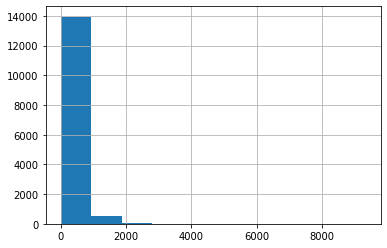

In [ ]:
# text lenghth analysis
#
#distribution of text
data_corpus2['review_body'].str.len().hist()

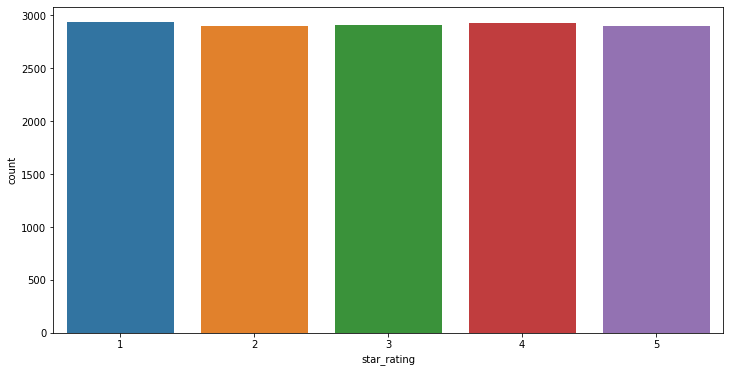

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))     #width and height
sns.countplot(x='star_rating',data=data_corpus2)

Tokenization

In [ ]:

# First, we will download the punkt sentence tokenizer into our notebook environment. 
# This tokenizer will divide text into a list of sentences / words. 
# ---
#
nltk.download('punkt')

In [ ]:
#Tokenization is the process dividing text documents into smaller parts called tokens. 
# Tokens can be either words, characters, or subwords. These tokens are very useful 
# for finding such patterns as well as is considered as a base step for stemming and lemmatization. 
# ---
# - The output of word tokenization can be converted to dataframe for better 
#   text understanding in machine learning applications. 
# - It can also be provided as input for further text cleaning steps such as punctuation removal,
#   
# ---
# 

# We can transform our third tweet as shown below
# ---
# 
words = TextBlob(data_corpus.review_body).words
print(words) 

In [ ]:
import re
import string

def clean_text_round1(text):
  '''Remove HTML tags, remove punctuation, make text lowercase, remove punctuation and remove words containing numbers.'''
  text = re.sub('<.*?>','', text)
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
  text = text.lower()
  text = re.sub('\d', '', text)
  return text

fix = lambda x: clean_text_round1(x)
data_corpus['review_body'] = pd.DataFrame(data_corpus.review_body.apply(fix))
data_corpus

In [ ]:
data_corpus2 = data_corpus.copy()

In [ ]:
from nltk.corpus import stopwords

In [ ]:
pip install nltk


In [ ]:
pip install wordnet

In [ ]:
nltk.download()

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

In [ ]:
data_corpus['review_body'] = data_corpus['review_body'].apply(nltk.word_tokenize)

In [ ]:
data_corpus['review_body']

In [ ]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
 
data_corpus['review_body'] = data_corpus['review_body'].apply(lambda x: [stemmer.stem(y) for y in x])

In [ ]:
data_corpus['review_body']


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

data_corpus['review_body'] = data_corpus['review_body'].apply(lambda x: ' '.join(x))

cv = CountVectorizer(stop_words='english')
text_1 = cv.fit_transform(data_corpus['review_body'])

In [ ]:
data_DTM = pd.DataFrame(text_1.toarray(), columns=cv.get_feature_names(), index=data_corpus.index)
data_DTM['star_rating'] = data_corpus2['star_rating']
data_DTM.head()


In [ ]:
data_DTM.star_rating.unique()

In [ ]:
data_DTM.shape